In [53]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

 summary DataSet includes count, mean, standard deviation, min, 25th percentile, median (50th percentile), 75th percentile, and max values for various features such as MSSubClass, LotFrontage, LotArea, OverallQual, and many others.

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

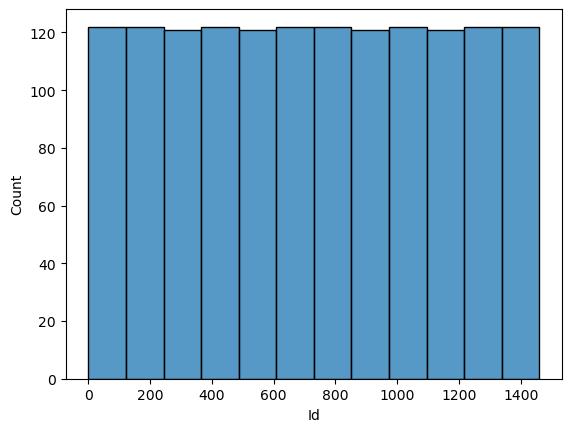

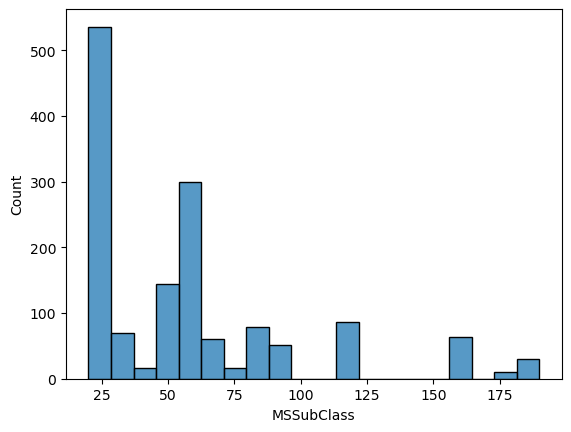

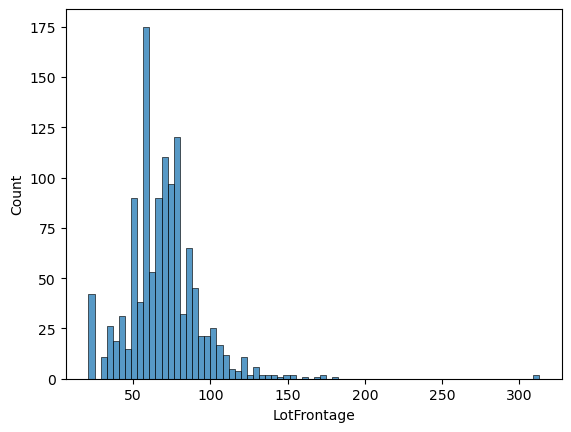

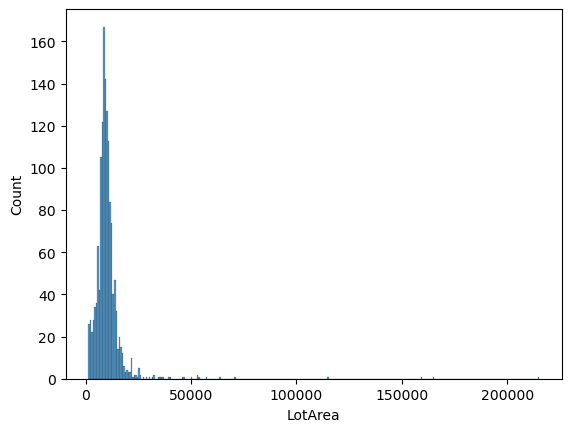

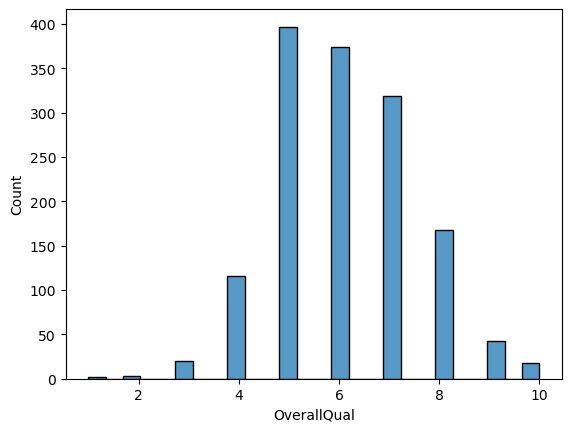

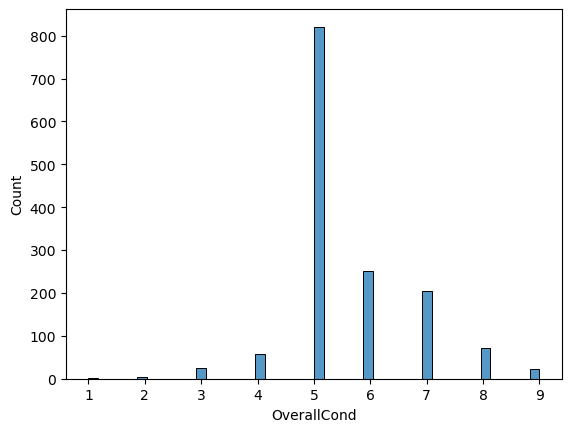

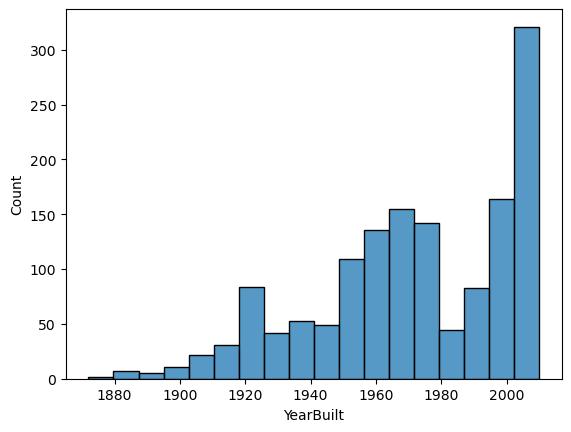

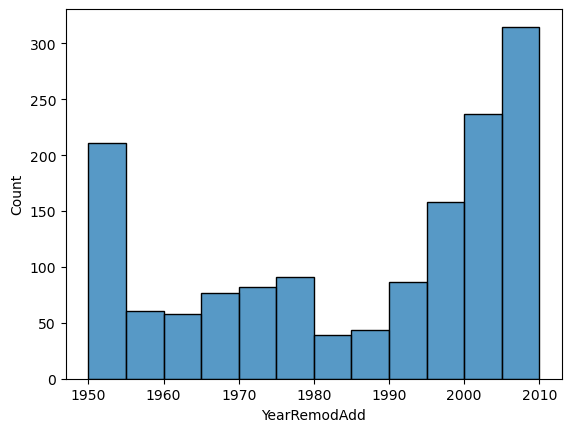

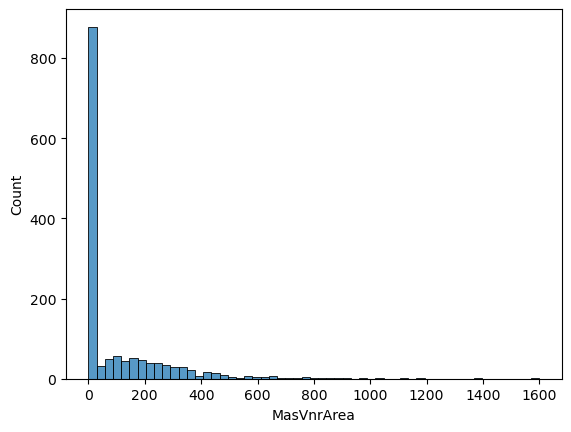

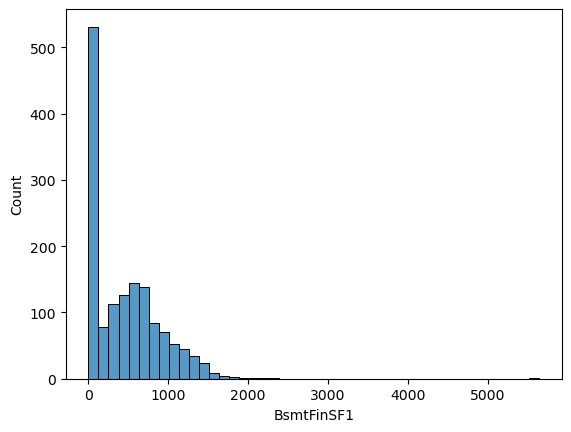

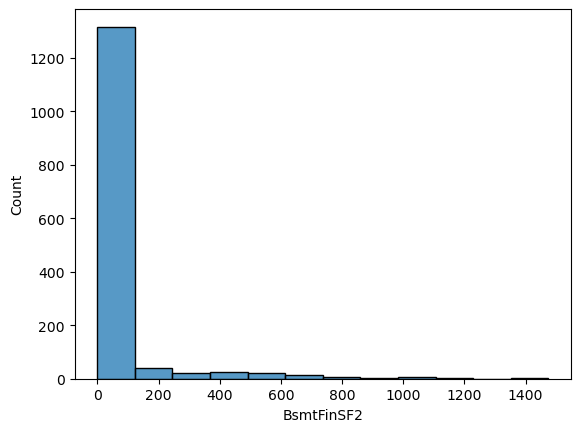

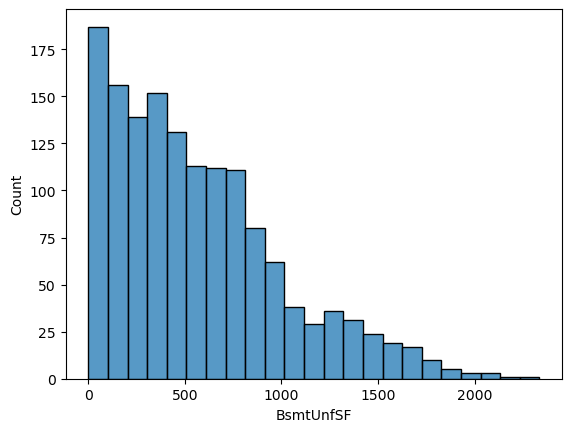

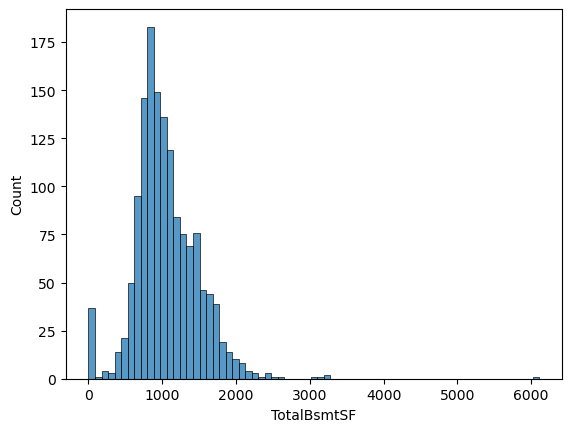

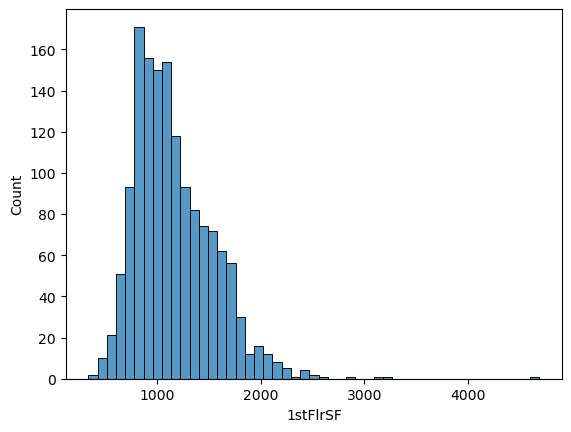

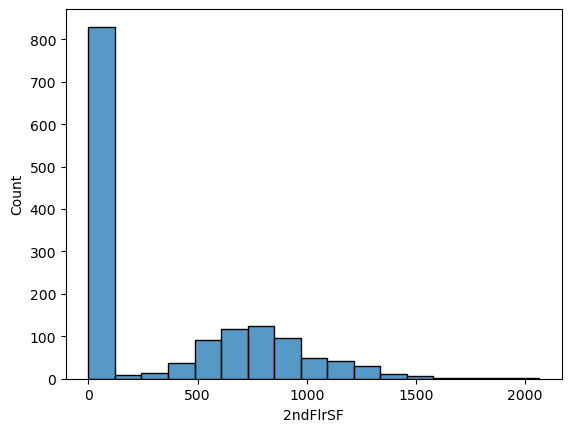

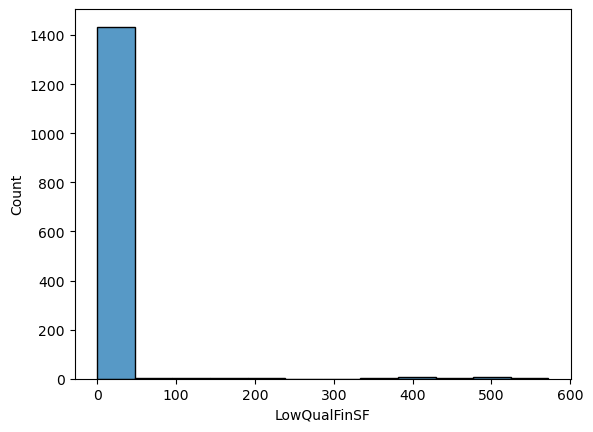

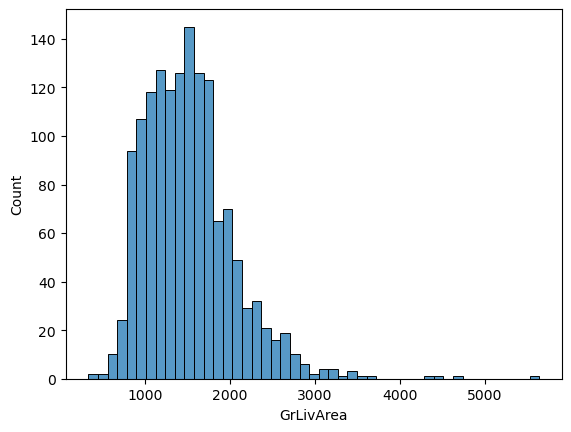

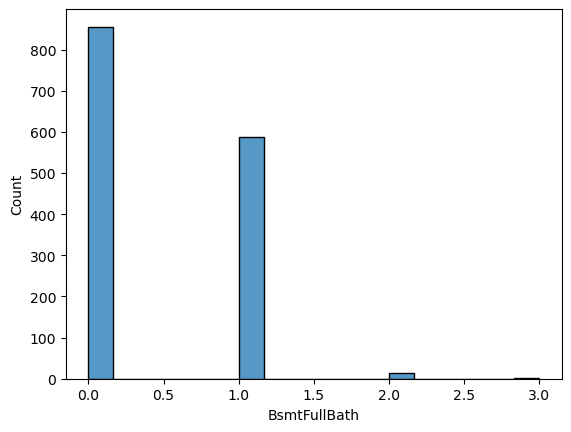

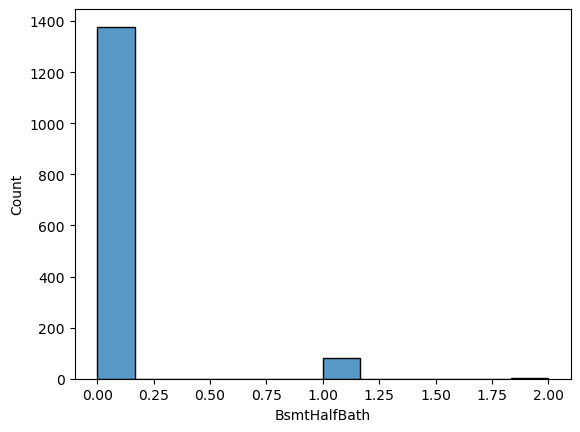

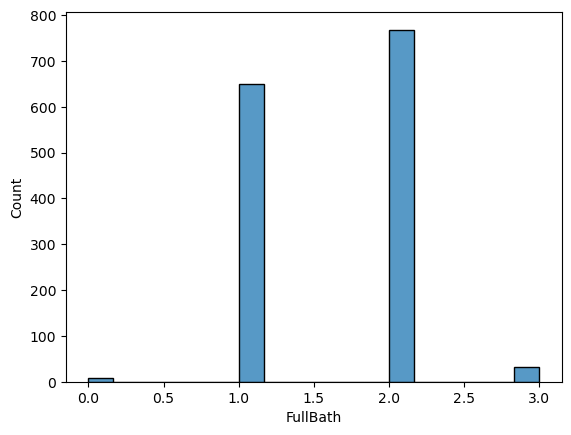

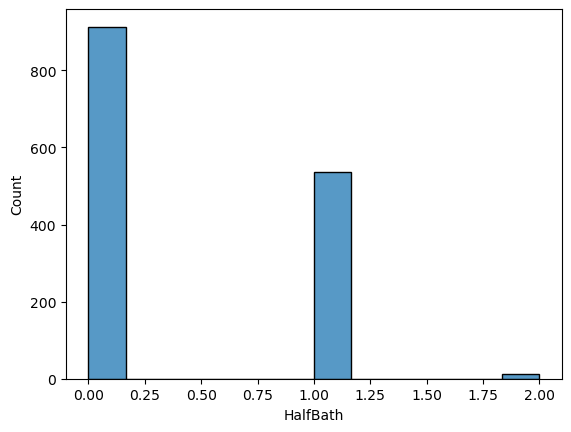

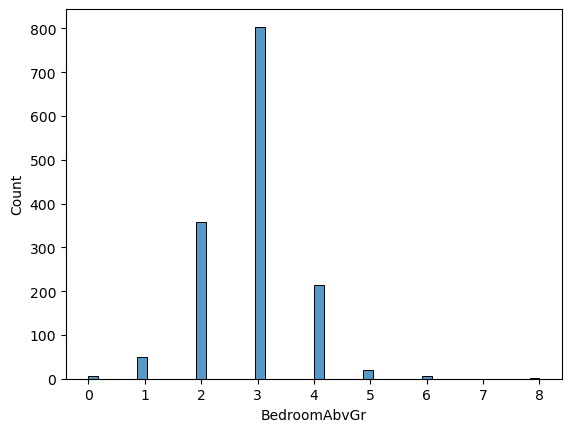

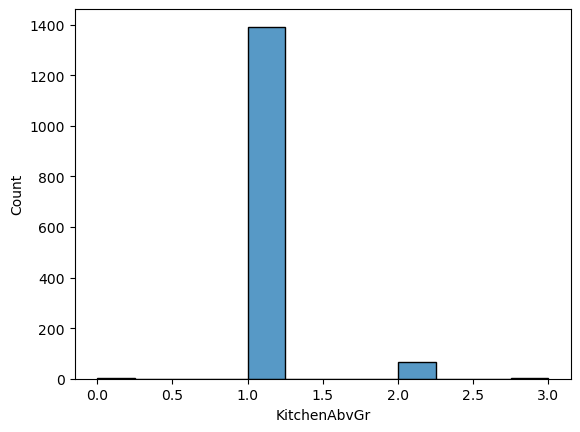

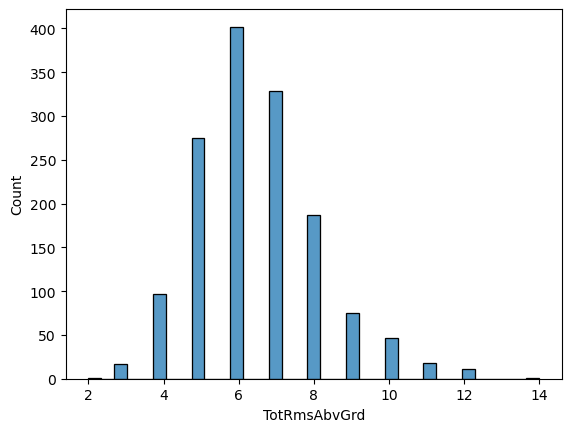

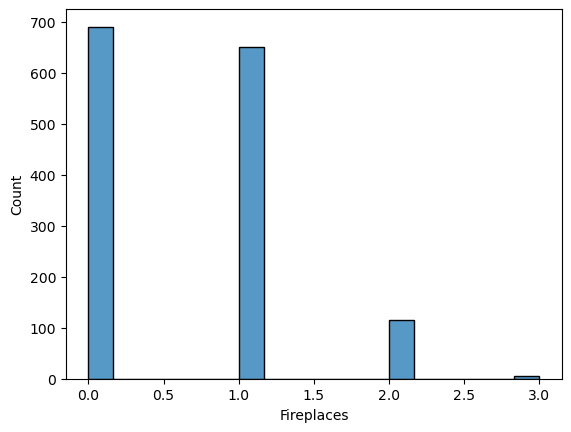

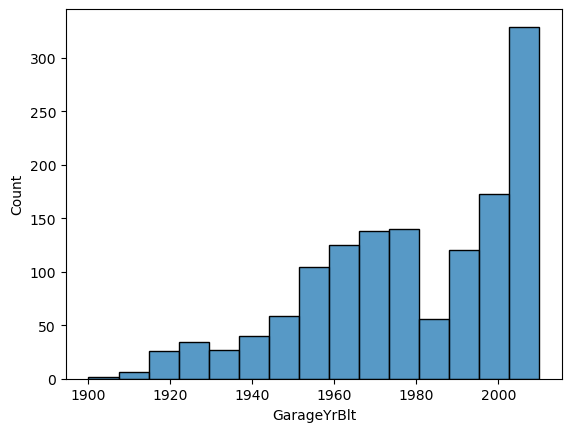

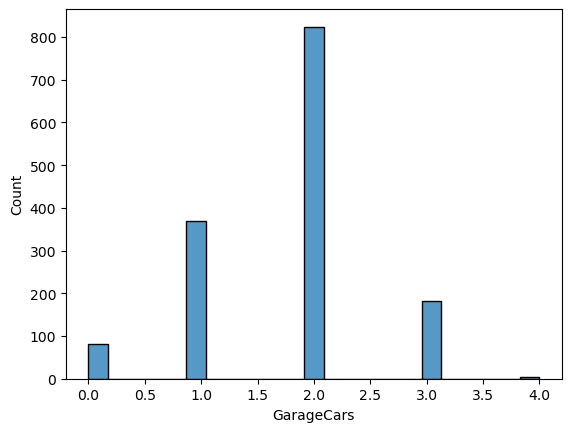

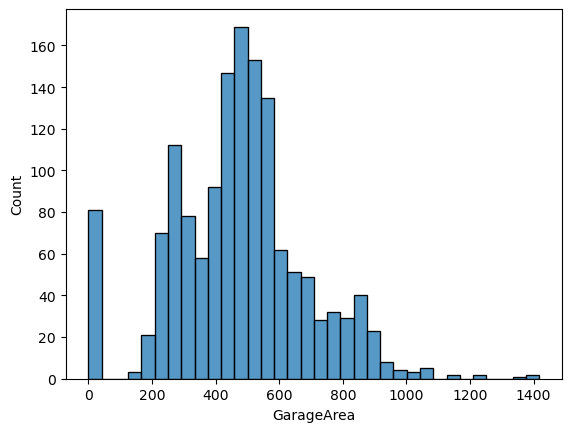

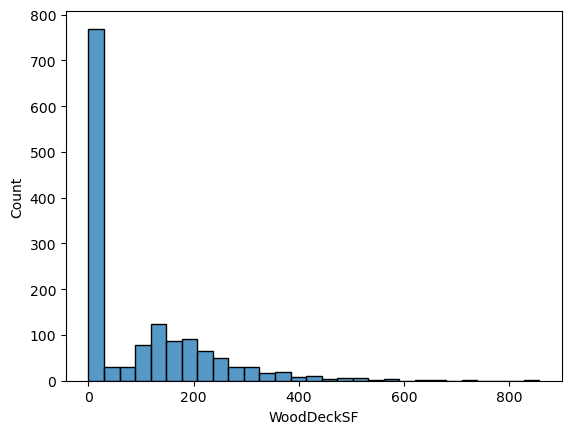

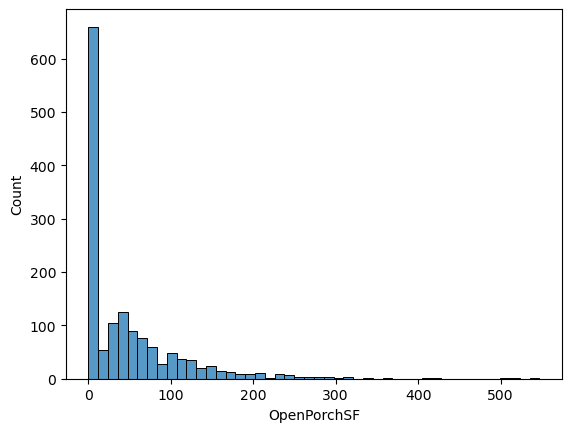

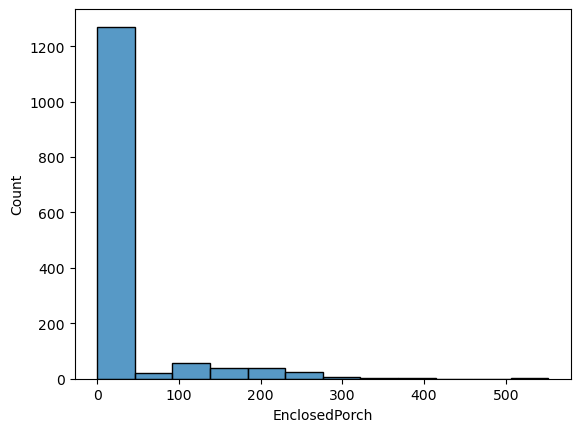

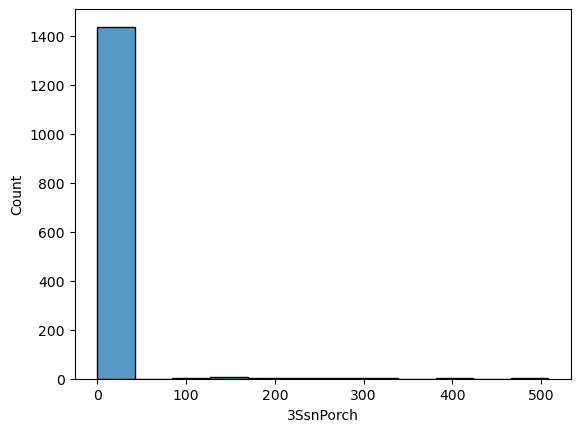

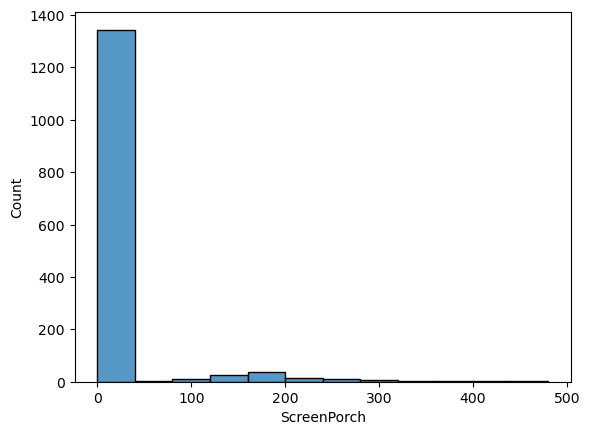

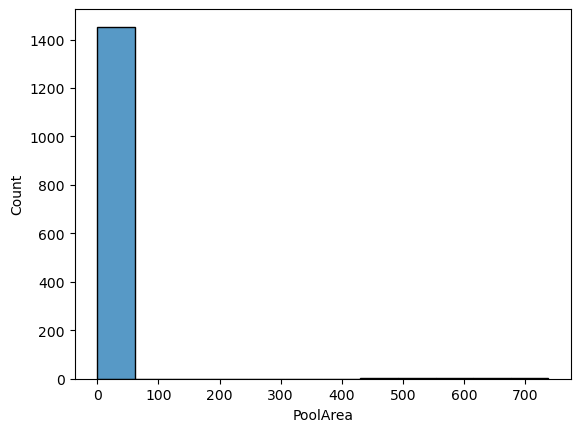

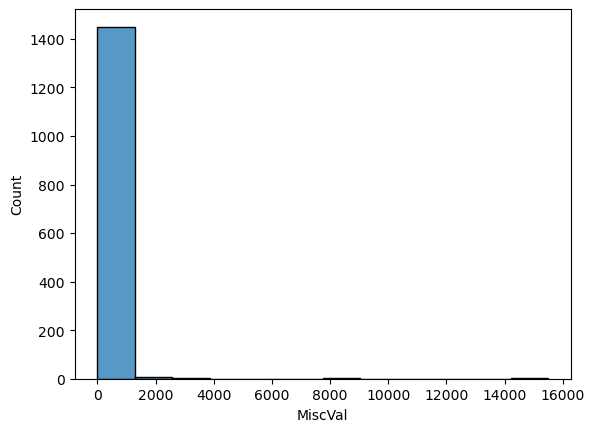

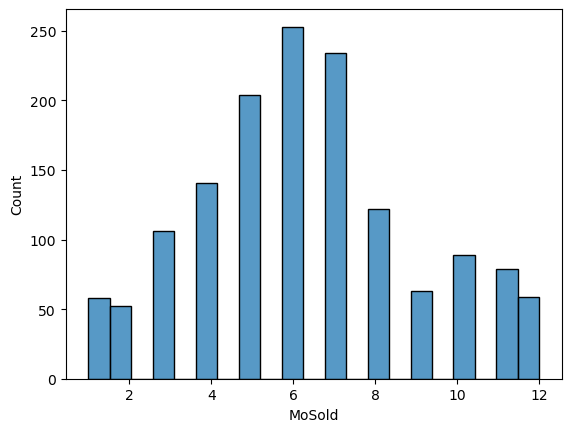

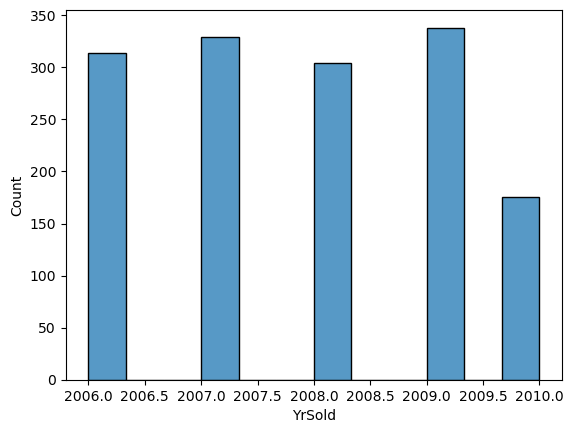

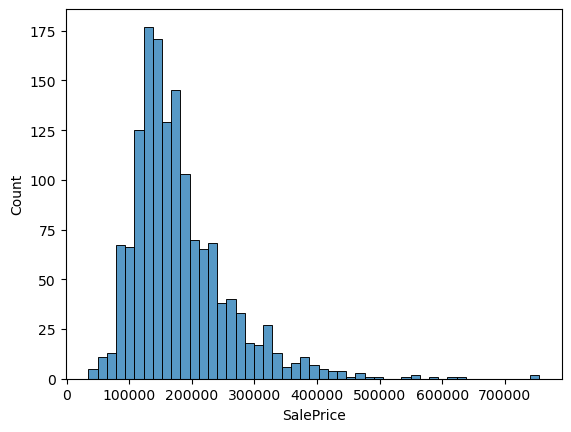

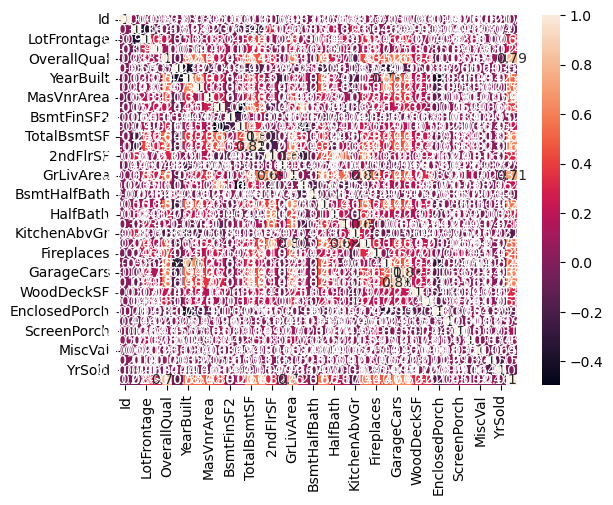

In [3]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats.mstats import winsorize
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

# Combine train and test datasets if necessary
# df = pd.concat([df_train, df_test], sort=False).reset_index(drop=True)

# Use one of the datasets for demonstration
df = df_train

# Data exploration
# Summary statistics
print(df.describe())

# Distribution of features for numerical data
for column in df.select_dtypes(include=np.number).columns:
    sns.histplot(df[column].dropna())
    plt.show()

# Handling missing values
# For numerical features, fill with mean
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# For categorical features, fill NaN values with 'Missing'
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns] = df[categorical_columns].fillna('Missing')

# Correlation matrix for numerical features
numerical_df = df.select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

# Detecting and treating outliers
# Winsorization
for column in numerical_df.columns:
    df[column] = winsorize(df[column], limits=[0.05, 0.05])

# Alternatively, removing extreme values based on Z-score
# Calculate Z-scores
z_scores = np.abs(stats.zscore(numerical_df))
# Remove outliers
df = df[(z_scores < 3).all(axis=1)]

# Continue with further data preprocessing and analysis...

 Feature Engineering:

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Load your dataset
df = pd.read_csv('train.csv')

# Separate the target variable and features
y = df['SalePrice']
X = df.drop('SalePrice', axis=1)

# List of categorical columns
categorical_cols = [cname for cname in X.columns if 
                    X[cname].dtype == "object"]

# List of numerical columns
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='mean')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Create and evaluate the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state=42)

# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = pipeline.predict(X_test)

# Evaluate the model
score = pipeline.score(X_test, y_test)
print('Model score:', score)

# Save the model if needed
# pd.to_pickle(pipeline, 'model.pkl')

Model score: 0.8882840234865855


Ensemble Modeling:

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import pandas as pd

# Load your dataset
train_df = pd.read_csv('train.csv')

# Separate the features and the target variable
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Define the categorical columns that you want to one-hot encode
categorical_columns = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
                       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
                       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
                       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
                       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

# Define the numerical columns (assuming all other columns are numerical)
numerical_columns = list(set(X.columns) - set(categorical_columns))

# Define the transformers for the numerical and categorical features
numerical_transformer = SimpleImputer(strategy='mean')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ])

# Define the model
rf = RandomForestRegressor(random_state=0)

# Create the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', rf)])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Define a grid of parameters to search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['sqrt', 'log2']  
}

# Create the grid search object
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"Best parameters found: {grid_search.best_params_}")
print(f"Best RMSE score: {(-grid_search.best_score_)**0.5}")

# Use the best estimator to make predictions
best_rf = grid_search.best_estimator_
preds = best_rf.predict(X_test)

# Evaluate the model
score = mean_squared_error(y_test, preds, squared=False)
print(f'RMSE on test set: {score}')

Best parameters found: {'model__max_depth': 30, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best RMSE score: 30175.82275250096
RMSE on test set: 35127.21602044877


**Hyperparameter Optimization**:

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import numpy as np

# Load your dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')  # Replace with your actual test data file

# Separate the features and the target variable
X = train_df.drop('SalePrice', axis=1)
y = train_df['SalePrice']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List of categorical features
categorical_features = ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle']
# Replace with the actual column names of your categorical features

# List of numerical features
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# This will automatically select all numerical columns in your dataset

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the model with the best parameters
model = RandomForestRegressor(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
preds = pipeline.predict(X_test)

# Evaluate the model
score = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', score)

RMSE: 32040.48861107099


**Regularization and Error Analysis**:

In [41]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Load your dataset
train_df = pd.read_csv('train.csv')

# One-hot encode the categorical variables
train_df_encoded = pd.get_dummies(train_df)

# Separate the features and the target variable
X = train_df_encoded.drop('SalePrice', axis=1)
y = train_df_encoded['SalePrice']

# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputation transformer for handling missing values
imputer = SimpleImputer(strategy='median')

# Preprocessing for numerical data: imputation followed by scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', imputer),
    ('scaler', StandardScaler())
])

# Assuming all other features are numerical after one-hot encoding
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, X_train.columns)
    ])

# Define the model with the best parameters
model = RandomForestRegressor(
    max_depth=30,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=200
)

# Bundle preprocessing and modeling code in a pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)
                          ])

# Preprocessing of training data, fit model 
pipeline.fit(X_train, y_train)

# Preprocessing of test data, get predictions
preds = pipeline.predict(X_test)

# Evaluate the model
score = np.sqrt(mean_squared_error(y_test, preds))
print('RMSE:', score)

RMSE: 32793.120292202264


**Cross-Validation and Model Evaluation**:

In [45]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd

# Load your dataset
data = pd.read_csv('train.csv')

# Separate target from predictors
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)

# Select categorical columns with relatively low cardinality
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() < 10 and 
                    X[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Perform cross-validation
cv_scores = cross_val_score(clf, X, y,
                            cv=5,
                            scoring='neg_mean_squared_error')

# Calculate RMSE
rmse_scores = np.sqrt(-cv_scores)

print("Average RMSE score:", rmse_scores.mean())

Average RMSE score: 30098.55061624439


**Model Interpretability and Insights**:

In [51]:
import shap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('train.csv')

# Separate target from predictors
y = data.SalePrice
X = data.drop(['SalePrice'], axis=1)

# Select categorical columns with relatively low cardinality (for example)
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() < 10 and 
                    X[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Transform the test set
X_test_transformed = my_pipeline.named_steps['preprocessor'].transform(X_test)

# Create the SHAP explainer object using the best estimator from the pipeline
explainer = shap.TreeExplainer(my_pipeline.named_steps['model'])

# Calculate SHAP values for the transformed test set
shap_values = explainer.shap_values(X_test_transformed)

# Visualize the first prediction's explanation
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], X_test_transformed[0])

predictive model for house prices 

In [54]:
# Print the column names to check for the 'Price' column
print(data.columns)

# If 'Price' is in the columns, drop it using the correct name
if 'Price' in data.columns:
    data.drop('Price', axis=1, inplace=True)
else:
    print("The column 'Price' does not exist in the DataFrame.")

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [63]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv('train.csv')

# Separate target from predictors
y = data['SalePrice']
X = data.drop(['SalePrice'], axis=1)

# Select categorical columns with relatively low cardinality (for example)
categorical_cols = [cname for cname in X.columns if
                    X[cname].nunique() < 10 and 
                    X[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X.columns if 
                  X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, preds)
print(f"Mean Squared Error: {mse}")



Mean Squared Error: 1227594020.3099935


In [78]:
# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=0)

# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# Split data into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

# Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# Load the test data
test_data = pd.read_csv('test.csv')

# Preprocessing of test data, fit model
preds_test = my_pipeline.predict(test_data)

# Save the predictions to a CSV file
output = pd.DataFrame({'Id': test_data.Id,
                       'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)